<a href="https://colab.research.google.com/github/NdettoMbalu/machine-learning-in-finance/blob/algorithms/Dimensionality_Reduction_and_Class_Separation_A_Comparative_Visualization_of_PCA_and_LDA_on_the_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction and Class Separation: A Comparative of PCA and LDA

Dimensionality reduction plays a vital role in machine learning and data visualization, helping uncover meaningful structure in high-dimensional datasets. Two of the most influential techniques in this domain are Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA).

PCA is an unsupervised method that projects data onto directions (principal components) capturing the maximum variance without considering class labels.

LDA, on the other hand, is a supervised technique that finds projections maximizing class separability, using label information to ensure the resulting subspace highlights differences between groups.

In this project, we apply both PCA and LDA to the Iris dataset, a benchmark dataset in pattern recognition that includes 150 flower samples from three species (Setosa, Versicolor, and Virginica) with four measured features.

The purpose of this comparison is to:

* Demonstrate how PCA and LDA project multidimensional data into a two-dimensional plane.

* Analyze how each method represents variance and class structure differently.

* Provide visual insights for selecting the most suitable method depending on the analytical goal.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# PCA (Unsupervised)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_var = pca.explained_variance_ratio_

# LDA (Supervised)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)


plt.style.use("seaborn-v0_8-whitegrid")
colors = ["#AEDFF7", "#C8E7D8", "#F7C6C7"]
font = {"family": "sans-serif", "weight": "bold", "size": 12}
plt.rc("font", **font)

def plot_projection(X_proj, method_name, xlabel, ylabel, explained_var=None):
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter_handles = []

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        scatter = ax.scatter(
            X_proj[y == i, 0],
            X_proj[y == i, 1],
            color=color,
            alpha=0.8,
            s=70,
            label=target_name,
            edgecolor="k",
            linewidth=0.5,
        )
        scatter_handles.append(scatter)

        # Center class cluster
        x_mean = np.mean(X_proj[y == i, 0])
        y_mean = np.mean(X_proj[y == i, 1])
        ax.text(
            x_mean,
            y_mean,
            target_name.capitalize(),
            fontsize=13,
            fontweight="bold",
            color="black",
            ha="center",
            va="center",
            bbox=dict(
                boxstyle="round,pad=0.3",
                facecolor="white",
                edgecolor="gray",
                alpha=0.6,
            ),
        )

    # Titles and labels
    ax.set_xlabel(xlabel, fontsize=13, fontweight="bold")
    ax.set_ylabel(ylabel, fontsize=13, fontweight="bold")
    ax.set_title(
        f"{method_name} Projection of IRIS Dataset",
        fontsize=15,
        fontweight="bold",
        pad=15,
    )

    ax.legend().set_visible(False)

    # Explained variance text for PCA
    if explained_var is not None:
        text = (
            f"Explained variance ratio:\n"
            f"PC1 = {explained_var[0]:.2f}, PC2 = {explained_var[1]:.2f}"
        )
        ax.text(
            0.02,
            -0.12,
            text,
            transform=ax.transAxes,
            fontsize=10,
            color="dimgray",
            verticalalignment="top",
        )

    # Style and grid
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.tight_layout()
    plt.show()


## Principal Component Analysis (PCA) Projection of the Iris Dataset: Unsupervised Dimensionality Reduction and Variance Structure Visualization

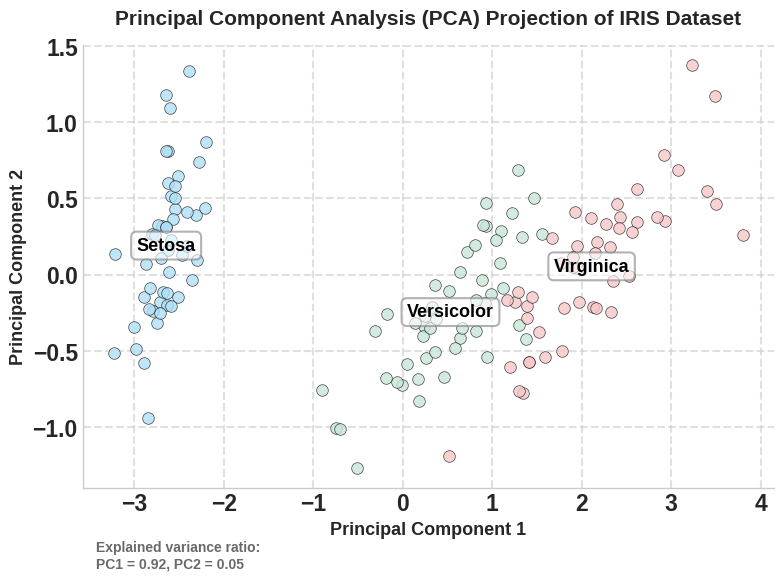

In [ ]:
# Plot PCA Projection
plot_projection(
    X_pca,
    "Principal Component Analysis (PCA)",
    "Principal Component 1",
    "Principal Component 2",
    explained_var=explained_var,
)

## Linear Discriminant Analysis (LDA) Projection of the Iris Dataset: Supervised Dimensionality Reduction and Class Separability Visualization

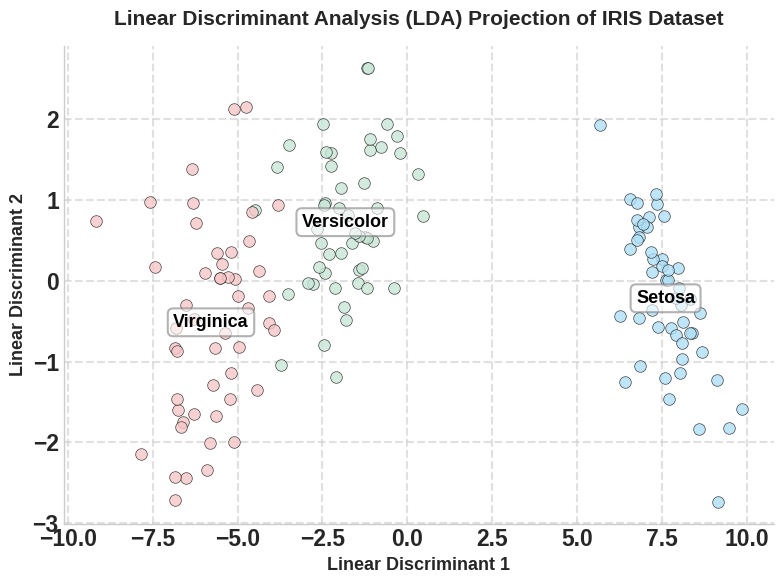

In [ ]:
# Plot LDA Projection
plot_projection(
    X_lda,
    "Linear Discriminant Analysis (LDA)",
    "Linear Discriminant 1",
    "Linear Discriminant 2",
)


# Conclusion

This comparative experiment illustrates the fundamental distinction between PCA and LDA in how they reduce dimensionality and represent structure in data.

PCA uncovers the most expressive directions of variance, making it ideal for unsupervised exploration, noise reduction, and preprocessing for clustering or visualization.

LDA focuses on maximizing separability among known classes, making it more suitable for supervised classification tasks and model interpretability.

In practice, PCA is ideal for unsupervised exploration,**noise reduction, and feature compression**, whereas LDA excels in supervised learning contexts, **enhancing class separability before applying classification algorithms**.

The Iris dataset vividly demonstrates that while PCA captures global variance patterns, LDA creates subspaces that better delineate class boundaries. Ultimately, the selection between PCA and LDA depends on whether the analytical goal prioritizes pattern discovery or discriminative representation.

This comparative study underscores that the choice between PCA and LDA should align with the learning objective whether the focus is on **pattern discovery or class discrimination.**

# References

* “Comparison of LDA and PCA 2D Projection of Iris Dataset.” scikit-learn: Machine Learning in Python, scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
. Accessed 16 Oct. 2025.

* Fisher, Ronald A. “The Use of Multiple Measurements in Taxonomic Problems.” Annals of Eugenics, vol. 7, part II, 1936, pp. 179–188. UCI Machine Learning Repository, https://uci-ics-mlr-prod.aws.uci.edu/dataset/53/iris
. Accessed 16 Oct. 2025.

* Rana, Debaraj, Swarna Prabha Jena, and Subrat Kumar Pradhan. “Performance Comparison of PCA and LDA with Linear Regression and Random Forest for IRIS Flower Classification.” PalArch’s Journal of Archaeology of Egypt / Egyptology, vol. 17, no. 9, 2020, pp. 2353–2360.

* Begum, Masrath, and Savita Sajjan. “Comparison of PCA And LDA For Face Recognition.” International Journal of Engineering Research & Technology (IJERT), vol. 2, no. 07, July 2013. IJERT, https://www.ijert.org/comparison-of-pca-and-lda-for-face-recognition
. Accessed 16 Oct. 2025.

* Cho, Hyunjong, and Seungbin Moon. “Comparison of PCA and LDA Based Face Recognition Algorithms Under Illumination Variations.” ICCAS-SICE 2009 – ICROS-SICE International Joint Conference 2009, Proceedings, 18–21 Aug. 2009, Fukuoka, Japan, pp. 4025–4030.

* Gewers, Felipe L., Gustavo R. Ferreira, Henrique F. de Arruda, Filipi N. Silva, Cesar H. Comin, Diego R. Amancio, and Luciano da F. Costa. “Principal Component Analysis: A Natural Approach to Data Exploration.” arXiv preprint, arXiv:1804.02502, 7 Apr. 2018.

* Deribe, Endale. Dimensionality Reduction and Classification Using Improved Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA). Addis Ababa University, 2020.

* GeeksforGeeks. “Comparison of LDA and PCA 2D Projection of Iris Dataset in Scikit Learn.” GeeksforGeeks, 23 July 2025, https://www.geeksforgeeks.org/machine-learning/comparison-of-lda-and-pca-2d-projection-of-iris-dataset-in-scikit-learn/
. Accessed 16 Oct. 2025.